Load imports and CSV file

In [154]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline

db = pd.read_csv("target_data_part1.csv", index_col=0)
db.dropna(axis=0, how='any', inplace=True)

db.head()

,Date,AAPL,ADBE,AMZN,BA,CMCSA,CSCO,CVX,DIS,FB,...,Hold (%),Underweight (%),Sell (%),Mean Tgt Price,# of Tgt Prices,Tgt Price Implied Return (%),0 days,1 days,7 days,30 days
0,2014-12-31,1,0,0,0,0,0,0,0,0,...,22.0,0.0,4.0,121.74,43,10.3,110.379997,109.330002,107.750000,117.160004
1,2015-03-31,1,0,0,0,0,0,0,0,0,...,22.4,0.0,4.1,138.35,41,11.2,124.430000,124.250000,126.010002,125.150002
2,2015-06-30,1,0,0,0,0,0,0,0,0,...,25.5,0.0,3.9,147.28,43,17.4,125.430000,126.599998,125.690002,122.370003
3,2015-09-30,1,0,0,0,0,0,0,0,0,...,17.6,0.0,3.9,145.84,44,32.2,110.300003,109.580002,110.779999,119.500000
4,2015-12-31,1,0,0,0,0,0,0,0,0,...,16.0,0.0,2.0,145.70,43,38.4,105.260002,105.349998,96.449997,96.430000


Remove columns not necessary for modelling

In [155]:
list(db)

['Date',
 'AAPL',
 'ADBE',
 'AMZN',
 'BA',
 'CMCSA',
 'CSCO',
 'CVX',
 'DIS',
 'FB',
 'GOOGL',
 'INTC',
 'KO',
 'LOW',
 'MCD',
 'MSFT',
 'MU',
 'NFLX',
 'NKE',
 'PEP',
 'SBUX',
 'T',
 'TGT',
 'VZ',
 'WMT',
 'XOM',
 'Mean Rating',
 'Mean Description',
 '# of Ratings',
 'Buy (%)',
 'Overweight (%)',
 'Hold (%)',
 'Underweight (%)',
 'Sell (%)',
 'Mean Tgt Price',
 '# of Tgt Prices',
 'Tgt Price Implied Return (%)',
 '0 days',
 '1 days',
 '7 days',
 '30 days']

In [156]:
db.drop(labels=['Date', 'Mean Description', 'Buy (%)', 'Overweight (%)', 'Hold (%)', 
                'Underweight (%)', 'Sell (%)'], axis=1, inplace=True)

db.dropna()

list(db)

['AAPL',
 'ADBE',
 'AMZN',
 'BA',
 'CMCSA',
 'CSCO',
 'CVX',
 'DIS',
 'FB',
 'GOOGL',
 'INTC',
 'KO',
 'LOW',
 'MCD',
 'MSFT',
 'MU',
 'NFLX',
 'NKE',
 'PEP',
 'SBUX',
 'T',
 'TGT',
 'VZ',
 'WMT',
 'XOM',
 'Mean Rating',
 '# of Ratings',
 'Mean Tgt Price',
 '# of Tgt Prices',
 'Tgt Price Implied Return (%)',
 '0 days',
 '1 days',
 '7 days',
 '30 days']

In [157]:
db.dropna(axis=0, how='any', inplace=True)

#Change predicted values to percentage changes, but leave original price as a factor
db['1 days'] = (db['1 days'] / db['0 days'] * 100) - 100
db['7 days'] = (db['7 days'] / db['0 days'] * 100) - 100
db['30 days'] = (db['30 days'] / db['0 days'] * 100) - 100

db.head()

,AAPL,ADBE,AMZN,BA,CMCSA,CSCO,CVX,DIS,FB,GOOGL,...,XOM,Mean Rating,# of Ratings,Mean Tgt Price,# of Tgt Prices,Tgt Price Implied Return (%),0 days,1 days,7 days,30 days
0,1,0,0,0,0,0,0,0,0,0,...,0,1.34,50,121.74,43,10.3,110.379997,-0.951255,-2.382675,6.142424
1,1,0,0,0,0,0,0,0,0,0,...,0,1.36,49,138.35,41,11.2,124.430000,-0.144660,1.269792,0.578640
2,1,0,0,0,0,0,0,0,0,0,...,0,1.38,51,147.28,43,17.4,125.430000,0.932790,0.207289,-2.439605
3,1,0,0,0,0,0,0,0,0,0,...,0,1.30,51,145.84,44,32.2,110.300003,-0.652766,0.435173,8.340886
4,1,0,0,0,0,0,0,0,0,0,...,0,1.24,50,145.70,43,38.4,105.260002,0.085499,-8.369756,-8.388753


In [158]:
#Drop AAPL to avoid colinearity
columns = ['ADBE','AMZN','BA','CMCSA','CSCO','CVX','DIS','FB',
           'GOOGL','INTC','KO','LOW','MCD','MSFT','MU','NFLX',
           'NKE','PEP','SBUX','T','TGT','VZ','WMT','XOM',
           'Mean Rating','# of Ratings','Mean Tgt Price','# of Tgt Prices',
           'Tgt Price Implied Return (%)','0 days']

db[columns] = db[columns].replace({',': ''}, regex=True)

X = db[columns]
Y1 = db['1 days']
Y2 = db['7 days']
Y3 = db['30 days']

In [159]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, Y1)
db['predicted 1 days'] = model.predict(X)

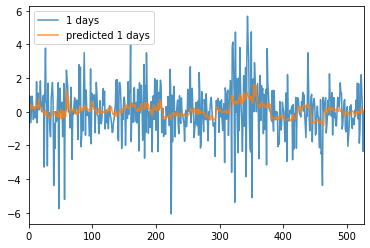

In [160]:
#Plot predicted vs actual for one day
db[['1 days', 'predicted 1 days']].plot(alpha=.8);

In [161]:
params = pd.Series(model.coef_, index=X.columns)
params

ADBE                           -0.572973
AMZN                           -0.520795
BA                             -0.663900
CMCSA                          -0.231889
CSCO                           -0.412516
CVX                            -0.646451
DIS                            -0.238367
FB                              0.065845
GOOGL                          -0.208309
INTC                           -0.648641
KO                             -0.809063
LOW                            -0.451256
MCD                            -0.808103
MSFT                           -0.319959
MU                             -0.014914
NFLX                            0.591048
NKE                            -0.031700
PEP                            -0.951550
SBUX                           -0.884368
T                              -0.319673
TGT                            -1.350242
VZ                             -0.456796
WMT                            -0.613110
XOM                            -0.849098
Mean Rating     

In [162]:
model2 = LinearRegression()
model2.fit(X, Y2)
db['predicted 7 days'] = model2.predict(X)

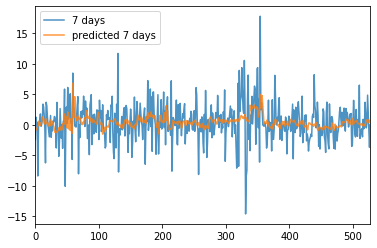

In [163]:
#Plot predicted vs actual for one week
db[['7 days', 'predicted 7 days']].plot(alpha=.8);

In [164]:
params = pd.Series(model2.coef_, index=X.columns)
params

ADBE                           -2.814344
AMZN                            0.536637
BA                             -2.203682
CMCSA                          -1.864158
CSCO                           -1.839307
CVX                            -2.822893
DIS                            -2.199597
FB                              1.147963
GOOGL                           0.429988
INTC                           -0.527202
KO                             -2.654130
LOW                            -2.578161
MCD                            -1.239556
MSFT                           -1.171454
MU                             -1.169651
NFLX                            2.392654
NKE                            -1.824914
PEP                            -2.883951
SBUX                           -1.884447
T                              -2.447133
TGT                            -3.359992
VZ                             -2.401776
WMT                            -1.582546
XOM                            -2.718320
Mean Rating     

In [165]:
model3 = LinearRegression()
model3.fit(X, Y3)
db['predicted 30 days'] = model.predict(X)

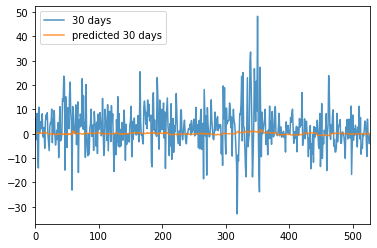

In [166]:
#Plot predicted vs actual for one month
db[['30 days', 'predicted 30 days']].plot(alpha=.8);

In [167]:
params = pd.Series(model3.coef_, index=X.columns)
params

ADBE                            -2.636323
AMZN                            15.547795
BA                              -1.500974
CMCSA                           -4.171384
CSCO                            -4.725566
CVX                             -5.879574
DIS                             -2.453133
FB                               4.817530
GOOGL                           13.438992
INTC                            -2.950774
KO                              -5.734908
LOW                             -3.781465
MCD                             -3.456056
MSFT                             1.460774
MU                              -6.922683
NFLX                             8.856465
NKE                             -2.419533
PEP                             -5.581225
SBUX                            -3.982205
T                               -8.950598
TGT                             -5.039062
VZ                              -7.509840
WMT                             -4.481560
XOM                             -6

In [168]:
model.score(X, Y1)

0.061172898890949574

In [169]:
model.score(X, Y2)

0.013328333135998238

In [170]:
model.score(X, Y3)

-0.05614586430893653

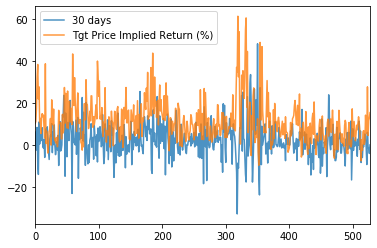

In [174]:
db[['30 days', 'Tgt Price Implied Return (%)']].plot(alpha=.8);

AttributeError: 'Series' object has no attribute 'reshape'